In [2]:
import pandas as pd

#### Провести базовий аналіз даних використовуючи pandas. Визначити набір колонок, які можуть бути використані для multivariate linear regression.

In [3]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



#### Ці дані містять інформацію про конкретну нерухомість. Кожен рядок представляє одну нерухомість, а стовпці містять різні деталі про цю нерухомість. Ось розбір стовпців:

Ці дані надають вичерпну інформацію про нерухомість, включаючи її фізичні характеристики, місцезнаходження та вартість.

- id: Унікальний ідентифікатор нерухомості
- date: Дата, коли була зроблена інформація про нерухомість
- price: Ціна нерухомості
- bedrooms: Кількість спалень у нерухомості
- bathrooms: Кількість ванних кімнат у нерухомості
- sqft_living: Площа житлової площі
- sqft_lot: Площа ділянки
- floors: Кількість поверхів у нерухомості
- waterfront: Чи є у нерухомості вид на воду (бінарний показник, 0 або 1)
- view: Кількість разів, коли нерухомість була переглянута
- condition: Стан нерухомості
- grade: Загальний рівень, визначений для нерухомості
- sqft_above: Площа внутрішнього простору, яка знаходиться вище рівня землі
- sqft_basement: Площа підвального приміщення
- yr_built: Рік побудови нерухомості
- yr_renovated: Рік реконструкції нерухомості (якщо є)
- zipcode: Поштовий індекс місцезнаходження нерухомості
- lat: Широта місцезнаходження нерухомості
- long: Довгота місцезнаходження нерухомості
- sqft_living15: Площа внутрішнього простору для найближчих 15 сусідніх нерухомостей
- sqft_lot15: Площа ділянки для найближчих 15 сусідніх нерухомостей

#### Обрати будь яку колонку з датасету (sqft_living для наведеного датасету) для моделі лінійної регресії з 1 змінною. За допомогою pandas або matplotlib візуалізувати зв'зок між обраної змінною і набором міток (sqft_living & price). Зберегти результат у файл

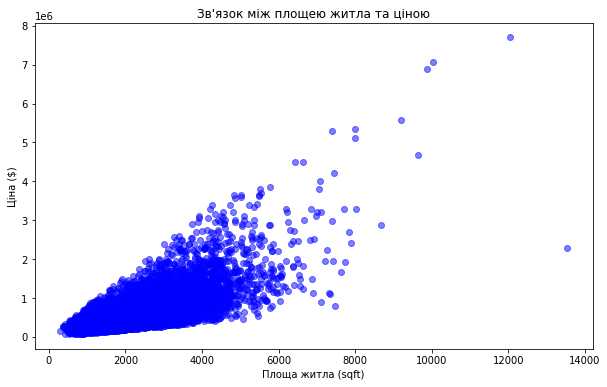

In [7]:
import matplotlib.pyplot as plt

x = data['sqft_living']
y = data['price']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('Зв\'язок між площею житла та ціною')
plt.xlabel('Площа житла (sqft)')
plt.ylabel('Ціна ($)')

plt.show()

#### Використовуючи sklearn побудувати і натренувати модель Linear Regression для обраної змінної. Порахувати точність. як метрику використати середнє квадратичне відхилення. За допомогою sklearn зберегти модель.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data[['sqft_living']]  
y = data['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 76484977061.77612


Дуже вела помилка, але, гадаю, так воно і має бути з однією змінною